In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [65]:
com = pd.read_excel('com_balanced-3.xlsx')
com

label                                           comments
0         1  жақсы бір өзіне сай азамат таппадынба? Шайтан ...
1         2  Ринат биликтеглердин созин соилеп калыпсынгои ...
2         2  Ыгаими мен сыгаи мусылман аты садака кетсин ак...
3         1                               Позор еркекте ес жоқ
4         0  Атырауға қыдырып емес жұмыс жасауға келгендер ...
...     ...                                                ...
8389      2          Озы кишкантай баладай минезы. Сойлегениде
8390      0              Бірдене жазайын сендер лайк басыңдар😅
8391      0                                    Бастамасы жақсы
8392      0            Көріп бастадым) біткенде жазам отзывты)
8393      2  Няғыл дит, қарауға болама, уақытымызды арнауға...

[8394 rows x 2 columns]

In [67]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     8394 non-null   int64 
 1   comments  8394 non-null   object
dtypes: int64(1), object(1)
memory usage: 131.3+ KB


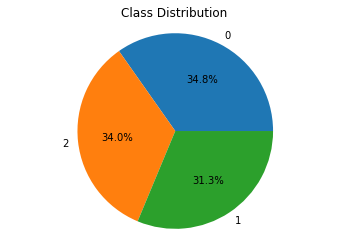

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Вычисление процентного соотношения классов
class_counts = com['label'].value_counts(normalize=True) * 100

# Создание круговой диаграммы
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')

# Отображение диаграммы
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
def remove_punc(text):
    remove = "".join([char for char in text if char not in string.punctuation])
    return remove

com["com"] = com["comments"].apply(lambda x: remove_punc(x).lower())

com.sample(5)

label                                           comments  \
742       1                                    Тозақта билеиді   
2083      0  Адал қызымет етіңіз ! Асхат мырза! Қазақ халқы...   
7005      0  Мына сөйлей алмай тұрған депудаттарды,шығарып,...   
7250      0  Бұлбұл сен долданбашы талып қаласын. СЕРІК ҮШІ...   
2774      1  Мына катын Ияаты жок Екеен шырлдатып Айелды из...   

                                                    com  
742                                     тозақта билеиді  
2083  адал қызымет етіңіз  асхат мырза қазақ халқы с...  
7005  мына сөйлей алмай тұрған депудаттардышығарыпба...  
7250  бұлбұл сен долданбашы талып қаласын серік үшін...  
2774  мына катын ияаты жок екеен шырлдатып айелды из...

In [73]:
import emoji

def remove_emojis(text):
    return emoji.get_emoji_regexp().sub('', text)
for column in com.columns:
    com["cleaned_com"] = com["com"].apply(remove_emojis)
    
com.sample(5)

<ipython-input-73-c240bbaf2ff7>:4: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub('', text)


label                                           comments  \
4545      2  Еки создин басын бириктире алмаса кайдагы депу...   
8232      2  Нурдаулетке айтпай озин секырмедынба мыкты болсан   
7978      1     Ой мына Кот Анельди жамандап тастаптыгой шшс .   
3580      2  Психолог Оз ойын емес разборканы разбирать ету...   
8124      0                     Не айтты сонша Анеля туралы т.   

                                                    com  \
4545  еки создин басын бириктире алмаса кайдагы депу...   
8232  нурдаулетке айтпай озин секырмедынба мыкты болсан   
7978      ой мына кот анельди жамандап тастаптыгой шшс    
3580  психолог оз ойын емес разборканы разбирать ету...   
8124                      не айтты сонша анеля туралы т   

                                            cleaned_com  
4545  еки создин басын бириктире алмаса кайдагы депу...  
8232  нурдаулетке айтпай озин секырмедынба мыкты болсан  
7978      ой мына кот анельди жамандап тастаптыгой шшс   
3580  психолог оз ойын емес разборканы разбирать ету...  
8124                      не айтты сонша анеля туралы т

In [174]:
com.sample(3)

label                                           comments  \
1849      2                                 Жасасын Қазақстан!   
3457      0          Шын мәнінде, жәй пенде екеніңе бір дәлел!   
6342      1  Гражданская қатынды қарғыс атсын.<br>Заңсыз тұ...   

                                                    com  \
1849                                  жасасын қазақстан   
3457            шын мәнінде жәй пенде екеніңе бір дәлел   
6342  гражданская қатынды қарғыс атсынbrзаңсыз тұрып...   

                                            cleaned_com  \
1849                                  жасасын қазақстан   
3457            шын мәнінде жәй пенде екеніңе бір дәлел   
6342  гражданская қатынды қарғыс атсынbrзаңсыз тұрып...   

                                         normalized_com  
1849                                  жасасын қазақстан  
3457            шын мәнінде жәй пенде екеніңе бір дәлел  
6342  гражданская қатынды қарғыс атсынbrзаңсыз тұрып...

In [179]:
subset = com.iloc[18:21]
subset

label                   comments                        com  \
18      2   Мәәә мәәәә дей бермееш😂😂   мәәә мәәәә дей бермееш😂😂   
19      1  Шошкадай болып кетыптыгой  шошкадай болып кетыптыгой   
20      0            Оте дурыс шешым            оте дурыс шешым   

                  cleaned_com             normalized_com  
18     мәәә мәәәә дей бермееш          мә мә дей бермееш  
19  шошкадай болып кетыптыгой  шошкадай болып кетыптыгой  
20            оте дурыс шешым            оте дурыс шешым

In [181]:
import re
import nltk
import plotly.graph_objects as go
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from pymystem3 import Mystem
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from razdel import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeinep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zeinep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [182]:
stop_words = nltk.corpus.stopwords.words("kazakh") 
com['non_stop'] = com['cleaned_com'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [184]:
com.sample(3)

label                                           comments  \
1532      1  Каргыс атсын буны истеп отыргандарды.Биз казак...   
1695      2                       Осы жургизуши биртурли екен.   
5272      2  БАЯҒЫДА БІРЕУ АЙТҚАН ЕКЕН КҮЛЕИІН ДЕП КҮЛМЕИМІ...   

                                                    com  \
1532  каргыс атсын буны истеп отыргандардыбиз казак ...   
1695                        осы жургизуши биртурли екен   
5272  баяғыда біреу айтқан екен күлеиін деп күлмеимі...   

                                            cleaned_com  \
1532  каргыс атсын буны истеп отыргандардыбиз казак ...   
1695                        осы жургизуши биртурли екен   
5272  баяғыда біреу айтқан екен күлеиін деп күлмеимі...   

                                         normalized_com  \
1532  каргыс атсын буны истеп отыргандардыбиз казак ...   
1695                        осы жургизуши биртурли екен   
5272  баяғыда біреу айтқан екен күлеиін деп күлмеимі...   

                                               non_stop  
1532  [к, а, р, г, ы, с,  , а, т, с, ы, н,  , б, у, ...  
1695  [с, ы,  , ж, у, р, г, и, з, у, ш, и,  , б, и, ...  
5272  [б, а, ғ, ы, д, а,  , б, і, р, у,  , а, й, т, ...

In [185]:
stopwords = nltk.corpus.stopwords.words("kazakh") 

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

com["non_stop"] = com["normalized_com"].apply(lambda x: remove_stopwords(x))
com.head()

label                                           comments  \
0      1  жақсы бір өзіне сай азамат таппадынба? Шайтан ...   
1      2  Ринат биликтеглердин созин соилеп калыпсынгои ...   
2      2  Ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3      1                               Позор еркекте ес жоқ   
4      0  Атырауға қыдырып емес жұмыс жасауға келгендер ...   

                                                 com  \
0  жақсы бір өзіне сай азамат таппадынба шайтан ғ...   
1  ринат биликтеглердин созин соилеп калыпсынгои ...   
2  ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3                               позор еркекте ес жоқ   
4  атырауға қыдырып емес жұмыс жасауға келгендер ...   

                                         cleaned_com  \
0  жақсы бір өзіне сай азамат таппадынба шайтан ғ...   
1  ринат биликтеглердин созин соилеп калыпсынгои ...   
2  ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3                               позор еркекте ес жоқ   
4  атырауға қыдырып емес жұмыс жасауға келгендер ...   

                                      normalized_com  \
0  жақсы бір өзіне сай азамат таппадынба шайтан ғ...   
1  ринат биликтеглердин созин соилеп калыпсынгои ...   
2  ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3                               позор еркекте ес жоқ   
4  атырауға қыдырып емес жұмыс жасауға келгендер ...   

                                            non_stop  
0  [ж, а, қ, с, ы,  , б, і, р,  , ө, з, і, н,  , ...  
1  [р, и, н, а, т,  , б, и, л, и, к, т, г, л, р, ...  
2  [ы, г, а, и, м, и,  , м, н,  , с, ы, г, а, и, ...  
3            [п, з, р,  , р, к, к, т,  , с,  , ж, қ]  
4  [а, т, ы, р, а, у, ғ, а,  , қ, ы, д, ы, р, ы, ...

In [199]:
com['tokenized_com'] = com['normalized_com'].apply(lambda x: [token.text for token in tokenize(x)])

# Remove stop words using the NLTK package
stop_words = nltk.corpus.stopwords.words("kazakh") 
com['non_stop'] = com['tokenized_com'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Alternatively, perform stemming using the SnowballStemmer from the NLTK package
stemmer = SnowballStemmer('russian')
com['stemmed'] = com['non_stop'].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization using the WordNetLemmatizer from the NLTK package
lemmatizer = WordNetLemmatizer()
com['lemmatized'] = com['non_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
com.sample(5)

label                                           comments  \
5319      0                                       кайф дисинго   
5723      1                Көт сүйгіш жағымпаз сорлы бишаралар   
7237      1  Аиза аузы жабылмаиды екен неге шыгарып жибирме...   
6902      2  Морозыңда Жалғасыңда тежегіштерғо. Олардан құт...   
7707      2   Алишер тура Тараздың еркектердің ұстаныма ғо😅😅😅😅   

                                                    com  \
5319                                       кайф дисинго   
5723                көт сүйгіш жағымпаз сорлы бишаралар   
7237  аиза аузы жабылмаиды екен неге шыгарып жибирме...   
6902  морозыңда жалғасыңда тежегіштерғо олардан құты...   
7707   алишер тура тараздың еркектердің ұстаныма ғо😅😅😅😅   

                                            cleaned_com  \
5319                                       кайф дисинго   
5723                көт сүйгіш жағымпаз сорлы бишаралар   
7237  аиза аузы жабылмаиды екен неге шыгарып жибирме...   
6902  морозыңда жалғасыңда тежегіштерғо олардан құты...   
7707       алишер тура тараздың еркектердің ұстаныма ғо   

                                         normalized_com  \
5319                                       кайф дисинго   
5723                көт сүйгіш жағымпаз сорлы бишаралар   
7237  аиза аузы жабылмаиды екен неге шыгарып жибирме...   
6902  морозыңда жалғасыңда тежегіштерғо олардан құты...   
7707       алишер тура тараздың еркектердің ұстаныма ғо   

                                               non_stop  \
5319                                    [кайф, дисинго]   
5723          [көт, сүйгіш, жағымпаз, сорлы, бишаралар]   
7237  [аиза, аузы, жабылмаиды, екен, неге, шыгарып, ...   
6902  [морозыңда, жалғасыңда, тежегіштерғо, құтылыңд...   
7707  [алишер, тура, тараздың, еркектердің, ұстаныма...   

                                          tokenized_com  \
5319                                    [кайф, дисинго]   
5723          [көт, сүйгіш, жағымпаз, сорлы, бишаралар]   
7237  [аиза, аузы, жабылмаиды, екен, неге, шыгарып, ...   
6902  [морозыңда, жалғасыңда, тежегіштерғо, олардан,...   
7707  [алишер, тура, тараздың, еркектердің, ұстаныма...   

                                                stemmed  \
5319                                     [кайф, дисинг]   
5723           [көт, сүйгіш, жағымпаз, сорл, бишаралар]   
7237  [аиз, ауз, жабылмаид, ек, нег, шыгарып, жибирм...   
6902  [морозыңд, жалғасыңд, тежегіштерғ, құтылыңдар,...   
7707  [алишер, тур, тараздың, еркектердің, ұстаным, ғо]   

                                             lemmatized  
5319                                    [кайф, дисинго]  
5723          [көт, сүйгіш, жағымпаз, сорлы, бишаралар]  
7237  [аиза, аузы, жабылмаиды, екен, неге, шыгарып, ...  
6902  [морозыңда, жалғасыңда, тежегіштерғо, құтылыңд...  
7707  [алишер, тура, тараздың, еркектердің, ұстаныма...

In [188]:
com.drop('normalized_com', axis= 1)

label                                           comments  \
0         1  жақсы бір өзіне сай азамат таппадынба? Шайтан ...   
1         2  Ринат биликтеглердин созин соилеп калыпсынгои ...   
2         2  Ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3         1                               Позор еркекте ес жоқ   
4         0  Атырауға қыдырып емес жұмыс жасауға келгендер ...   
...     ...                                                ...   
8389      2          Озы кишкантай баладай минезы. Сойлегениде   
8390      0              Бірдене жазайын сендер лайк басыңдар😅   
8391      0                                    Бастамасы жақсы   
8392      0            Көріп бастадым) біткенде жазам отзывты)   
8393      2  Няғыл дит, қарауға болама, уақытымызды арнауға...   

                                                    com  \
0     жақсы бір өзіне сай азамат таппадынба шайтан ғ...   
1     ринат биликтеглердин созин соилеп калыпсынгои ...   
2     ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3                                  позор еркекте ес жоқ   
4     атырауға қыдырып емес жұмыс жасауға келгендер ...   
...                                                 ...   
8389           озы кишкантай баладай минезы сойлегениде   
8390              бірдене жазайын сендер лайк басыңдар😅   
8391                                    бастамасы жақсы   
8392              көріп бастадым біткенде жазам отзывты   
8393  няғыл дит қарауға болама уақытымызды арнауға б...   

                                            cleaned_com  \
0     жақсы бір өзіне сай азамат таппадынба шайтан ғ...   
1     ринат биликтеглердин созин соилеп калыпсынгои ...   
2     ыгаими мен сыгаи мусылман аты садака кетсин ак...   
3                                  позор еркекте ес жоқ   
4     атырауға қыдырып емес жұмыс жасауға келгендер ...   
...                                                 ...   
8389           озы кишкантай баладай минезы сойлегениде   
8390               бірдене жазайын сендер лайк басыңдар   
8391                                    бастамасы жақсы   
8392              көріп бастадым біткенде жазам отзывты   
8393  няғыл дит қарауға болама уақытымызды арнауға б...   

                                               non_stop  \
0     [жақсы, бір, сай, азамат, таппадынба, шайтан, ...   
1     [ринат, биликтеглердин, созин, соилеп, калыпсы...   
2     [ыгаими, сыгаи, мусылман, аты, садака, кетсин,...   
3                                  [позор, еркекте, ес]   
4     [атырауға, қыдырып, жұмыс, жасауға, келгендер,...   
...                                                 ...   
8389     [озы, кишкантай, баладай, минезы, сойлегениде]   
8390         [бірдене, жазайын, сендер, лайк, басыңдар]   
8391                                 [бастамасы, жақсы]   
8392        [көріп, бастадым, біткенде, жазам, отзывты]   
8393  [няғыл, дит, қарауға, болама, уақытымызды, арн...   

                                          tokenized_com  \
0     [жақсы, бір, өзіне, сай, азамат, таппадынба, ш...   
1     [ринат, биликтеглердин, созин, соилеп, калыпсы...   
2     [ыгаими, мен, сыгаи, мусылман, аты, садака, ке...   
3                             [позор, еркекте, ес, жоқ]   
4     [атырауға, қыдырып, емес, жұмыс, жасауға, келг...   
...                                                 ...   
8389     [озы, кишкантай, баладай, минезы, сойлегениде]   
8390         [бірдене, жазайын, сендер, лайк, басыңдар]   
8391                                 [бастамасы, жақсы]   
8392        [көріп, бастадым, біткенде, жазам, отзывты]   
8393  [няғыл, дит, қарауға, болама, уақытымызды, арн...   

                                                stemmed  \
0         [жақс, бір, са, азамат, таппадынб, шайта, ғо]   
1     [ринат, биликтеглердин, созин, соилеп, калыпсы...   
2     [ыга, сыга, мусылма, ат, садак, кетсин, ак, ше...   
3                                   [позор, еркект, ес]   
4     [атырауғ, қыдырып, жұмыс, жасауғ, келгендер, б...   
...                    

In [200]:
com.sample(3)

label                                           comments  \
3654      1                                       Қуады осылар   
173       0  Халықтың аманатына қиянат жасай алмаймын. 1 те...   
6491      1  Қайраң қазағым, әр ұлт өкілдерін бауырына баса...   

                                                    com  \
3654                                       қуады осылар   
173   халықтың аманатына қиянат жасай алмаймын 1 тең...   
6491  қайраң қазағым әр ұлт өкілдерін бауырына баса ...   

                                            cleaned_com  \
3654                                       қуады осылар   
173   халықтың аманатына қиянат жасай алмаймын 1 тең...   
6491  қайраң қазағым әр ұлт өкілдерін бауырына баса ...   

                                         normalized_com  \
3654                                       қуады осылар   
173   халықтың аманатына қиянат жасай алмаймын 1 тең...   
6491  қайраң қазағым әр ұлт өкілдерін бауырына баса ...   

                                               non_stop  \
3654                                    [қуады, осылар]   
173   [халықтың, аманатына, қиянат, жасай, алмаймын,...   
6491  [қайраң, қазағым, әр, ұлт, өкілдерін, бауырына...   

                                          tokenized_com  \
3654                                    [қуады, осылар]   
173   [халықтың, аманатына, қиянат, жасай, алмаймын,...   
6491  [қайраң, қазағым, әр, ұлт, өкілдерін, бауырына...   

                                                stemmed  \
3654                                     [қуад, осылар]   
173   [халықтың, аманатын, қиянат, жаса, алмаймын, 1...   
6491  [қайраң, қазағ, әр, ұлт, өкілдерін, бауырын, б...   

                                             lemmatized  
3654                                    [қуады, осылар]  
173   [халықтың, аманатына, қиянат, жасай, алмаймын,...  
6491  [қайраң, қазағым, әр, ұлт, өкілдерін, бауырына...

In [175]:
from __future__ import print_function
import os

from kaznlp.normalization.ininorm import Normalizer

from kaznlp.tokenization.tokrex import TokenizeRex
from kaznlp.tokenization.tokhmm import TokenizerHMM

from kaznlp.lid.lidnb import LidNB

from kaznlp.morphology.analyzers import AnalyzerDD
from kaznlp.morphology.taggers import TaggerHMM



In [170]:
ininormer = Normalizer()
com["normalized_com"]=com.apply(lambda row: ininormer.normalize(row["cleaned_com"], desegment=2, dedupe=2, stats=False).lower(), axis=1)  
print(com["normalized_com"][:5], sep = "\n")

0    жақсы бір өзіне сай азамат таппадынба шайтан ғ...
1    ринат биликтеглердин созин соилеп калыпсынгои ...
2    ыгаими мен сыгаи мусылман аты садака кетсин ак...
3                                 позор еркекте ес жоқ
4    атырауға қыдырып емес жұмыс жасауға келгендер ...
Name: normalized_com, dtype: object


In [202]:
pip install gensim

     |████████████████████████████████| 24.0 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 35.0 MB 4.4 MB/s eta 0:00:01     |████████████████████▊           | 22.7 MB 6.7 MB/s eta 0:00:02     |███████████████████████████████▊| 34.7 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 4.3 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
Note: you may need to restart the kernel to use updated packages.


In [204]:
pip install --upgrade numpy

     |████████████████████████████████| 19.8 MB 2.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


In [214]:
pip uninstall numpy

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Would remove:
    /opt/anaconda3/bin/f2py
    /opt/anaconda3/bin/f2py3
    /opt/anaconda3/bin/f2py3.8
    /opt/anaconda3/lib/python3.8/site-packages/numpy-1.24.3.dist-info/*
    /opt/anaconda3/lib/python3.8/site-packages/numpy/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [215]:
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Создание корпуса документов
corpus = [doc.split() for doc in your_data]

# Создание словаря
dictionary = corpora.Dictionary(corpus)

# Создание мешка слов (Bag of Words)
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# Создание модели LDA
lda_model = models.LdaModel(bow_corpus, num_topics=5, id2word=dictionary)

# Визуализация модели LDA
lda_visualization = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(lda_visualization)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [171]:
com = com.dropna(subset=['label'])
from imblearn.over_sampling import RandomOverSampler

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(com.drop('label', axis=1), com['label'])

# Convert back into a DataFrame
com_balanced = pd.concat([pd.DataFrame(y_over), pd.DataFrame(X_over)], axis=1)

In [16]:
com_balanced = com_balanced.sample(frac=1).reset_index(drop=True)

In [17]:
com_balanced.to_excel('com_balanced.xlsx', index=False)

In [18]:
from IPython.display import FileLink
FileLink('com_balanced.xlsx')

/Users/zeinep/Desktop/kaznlp-master/com_balanced.xlsx

In [19]:
com = pd.read_excel('com_balanced3.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'com_balanced3.xlsx'

In [264]:
print(com['label'].value_counts())

0    2918
2    2850
1    2626
Name: label, dtype: int64


In [57]:
com = pd.read_excel('data_com.xlsx')
com

label                                           comments
0       1.0  Кім анау терпила деп бөсіп тұрған? Өзіне осы ұ...
1       1.0  Мал болып жүріндер солай, терпиладеп ондайды а...
2       2.0   Жемқорлықтың әсері барлық жерде бақырайып тұрады
3       0.0           Ең керемет айғой мерекеде, демалыста бар
4       0.0  Рамазан айымызда Алладан тiлеймiн. Калганы мен...
...     ...                                                ...
6108    1.0     Айза сен сөйлемеші сениң даусьң өте жаман екен
6109    1.0  Айза өте жаман қиз жобадан кетши сен торғай сі...
6110    2.0                    Шынымен отирик талдынгой Булбул
6111    1.0                     Айзаны куып шыгындаршы эобадан
6112    2.0  Кип кишкентай болып бай издегенше окып омирнде...

[6113 rows x 2 columns]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

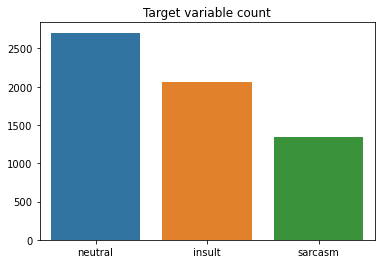

In [59]:
x=com['label'].value_counts().values
sns.barplot(["neutral","insult","sarcasm"],x)
plt.title('Target variable count')

In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Check class distribution before oversampling
print("Before SMOTE:")
print(Counter('label'))

# Combine feature data and target labels
data = np.column_stack((X, ;bael))

# Separate samples for each class
class_samples = {}
for class_label in np.unique(y):
    class_samples[class_label] = data[data[:, -1] == class_label, :-1]

# Oversample each class separately using SMOTE
oversampled_samples = []
oversampled_labels = []
smote = SMOTE(random_state=42)
for class_label, samples in class_samples.items():
    oversampled, oversampled_labels_current = smote.fit_resample(samples, np.full(len(samples), class_label))
    oversampled_samples.append(oversampled)
    oversampled_labels.append(oversampled_labels_current)

# Concatenate the oversampled data for all classes
X_resampled = np.concatenate(oversampled_samples)
y_resampled = np.concatenate(oversampled_labels)

# Check class distribution after oversampling
print("After SMOTE:")
print(Counter(y_resampled))


Before SMOTE:
Counter({'l': 2, 'a': 1, 'b': 1, 'e': 1})


NameError: name 'X' is not defined

In [3]:
com

label                                           comments
0         1                              Шеттеріңнен малсыңдар
1         1        Не мынау жайлаудағы жамыраған маллар құсап😅
2         2               Калаулымды чисто ұрыс үшін көремшеее
3         0  Біттей Мерейдің миындай миларың жоқ .Жан жануа...
4         1  түбегейлі құртайын деп тұрған сияқты ғой мына ...
...     ...                                                ...
6108      2  Калаулымнан шыккандар отыргой психолог и мына ...
6109      1  Мына ұрышайтанның қандендерінің түрілерін ай ,...
6110      1  Пипец аш қалмасақ болды әйтеуір елдің 50%зы ос...
6111      1          Қай жерін қызғанады адам сүйер қылығы жоқ
6112      2       Мемлекет толесин диди, хахаха. Обалдарын жок

[6113 rows x 2 columns]

In [216]:
import string

# Function to calculate length of message excluding space
com['com_char'] = com['normalized_com'].apply(lambda x: len(x) - x.count(" "))
com['com_words'] = com['normalized_com'].apply(lambda x:  x.count(" ")+1)

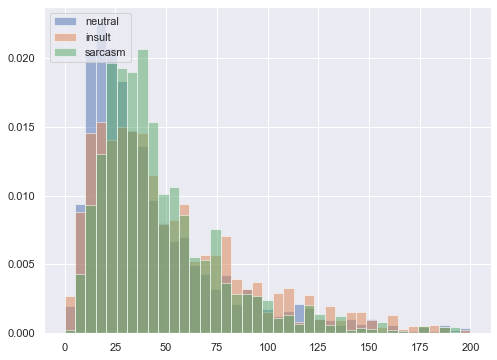

In [217]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)
plt.hist(com[com['label']==0]['com_char'], bins, alpha=0.5, density=True, label='neutral')
plt.hist(com[com['label']==1]['com_char'], bins, alpha=0.5, density=True, label='insult')
plt.hist(com[com['label']==2]['com_char'], bins, alpha=0.5, density=True, label='sarcasm')

plt.legend(loc='upper left')
plt.show()

In [218]:
from sklearn.model_selection import train_test_split

X=com[['lemmatized','com_char', 'com_words']]
y=com['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

def to_tfidf(text):
    return ' '.join(text)

X = tfidf.fit_transform(com['lemmatized'].apply(to_tfidf))
y = com['label']

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

lemmatized_train = [' '.join(tokens) for tokens in X_train['lemmatized']]
lemmatized_test = [' '.join(tokens) for tokens in X_test['lemmatized']]

# Create and apply TfidfVectorizer on training data
tfidf_vect = TfidfVectorizer()
tfidf_train = tfidf_vect.fit_transform(lemmatized_train)
tfidf_test = tfidf_vect.transform(lemmatized_test)

# Create a Data Frame with attributes and combine it with other columns
X_train_vect = pd.concat([X_train[['com_char', 'com_words']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['com_char', 'com_words']].reset_index(drop=True),
                         pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

com_char  com_words    0         1    2    3    4    5    6    7  ...  \
0        90         11  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1        86         15  0.0  0.255516  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2        45          5  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3       116         20  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4        10          3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   15820  15821  15822  15823  15824  15825  15826  15827  15828  15829  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 15832 columns]

In [221]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow=CountVectorizer().fit_transform(com['normalized_com'])



In [222]:
messages_bow

<8394x18121 sparse matrix of type '<class 'numpy.int64'>'
	with 69877 stored elements in Compressed Sparse Row format>

In [223]:
messages_bow.shape

(8394, 18121)

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(messages_bow,com['label'],test_size=0.2,random_state=42)

In [241]:
import numpy as np
from scipy.sparse import csr_matrix

class MyCountVectorizer:
    def __init__(self):
        self.word_counts = {}
        self.vocab = []
    
    def fit_transform(self, text_data):
        # Проход по каждому тексту в наборе данных
        for text in text_data:
            # Разделение текста на отдельные слова
            words = text.split()
            
            # Подсчет количества вхождений каждого слова
            for word in words:
                if word in self.word_counts:
                    self.word_counts[word] += 1
                else:
                    self.word_counts[word] = 1
                    self.vocab.append(word)
        
        # Создание разреженной матрицы с количеством вхождений слов
        rows = []
        cols = []
        values = []
        for i, text in enumerate(text_data):
            words = text.split()
            for word in words:
                rows.append(i)
                cols.append(self.vocab.index(word))
                values.append(self.word_counts[word])
        
        word_counts_matrix = csr_matrix((values, (rows, cols)), shape=(len(text_data), len(self.vocab)))
        
        return word_counts_matrix, self.vocab


# Пример использования
text_data = com['normalized_com']

count_vectorizer = MyCountVectorizer()
word_counts_matrix, vocab = count_vectorizer.fit_transform(text_data)

# Вывод разреженной матрицы с количеством вхождений слов
print(word_counts_matrix.toarray())

# Вывод словаря
print(vocab)

[[188 224  62 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [188   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   1   1   1]]
['жақсы', 'бір', 'өзіне', 'сай', 'азамат', 'таппадынба', 'шайтан', 'ғой', 'мынау', 'ринат', 'биликтеглердин', 'созин', 'соилеп', 'калыпсынгои', 'домбыранды', 'сабалап', 'шындыкты', 'аитушы', 'един', 'ыгаими', 'мен', 'сыгаи', 'мусылман', 'аты', 'садака', 'кетсин', 'аке', 'шеше', 'деген', 'исиде', 'жок', 'позор', 'еркекте', 'ес', 'жоқ', 'атырауға', 'қыдырып', 'емес', 'жұмыс', 'жасауға', 'келгендер', 'болар', 'мыналарды', 'ким', 'сайлады', 'дурыста', 'соилеи', 'алмай', 'тургои', 'маскара', 'жаман', 'токал', 'нестерин', 'билмей', 'калды', 'биреудин', 'омирин', 'талкыламас', 'бурын', 'оз', 'омиринди', 'тузе', 'тараңдар', 'абден', 'ұятқа', 'қалдырдыңдар', 'өңкей', 'ез', 'намыссыздар', 'арыстан', 'жарым', 'осыны', 'құда', 'бала', 'қылып', 'жүрген', 'даже', 'тойыңада', 'арыстандыда', 'шақырмадынғо', 'оңба

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 62989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 62541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 62996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 62543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 62459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from c

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 62543 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 62459 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 62460 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 62869 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 61936 missing from current fon

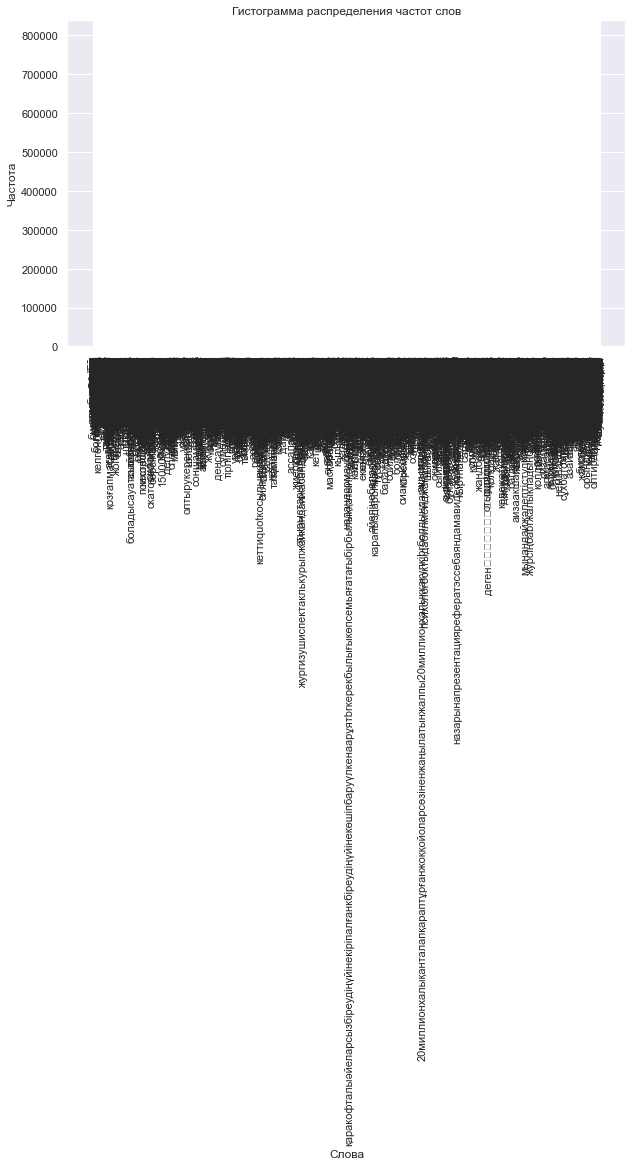

In [243]:
import matplotlib.pyplot as plt

# Вычисление суммы частот слов в каждом столбце разреженной матрицы
word_freq = word_counts_matrix.sum(axis=0).tolist()[0]

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(vocab, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Гистограмма распределения частот слов')
plt.show()

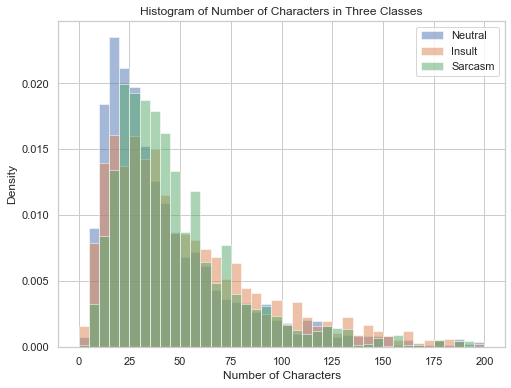

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size and style for plotting
sns.set(rc={"figure.figsize": (8, 6)})
sns.set_style("whitegrid")

# Data for each class
class0_chars = com[com['label'] == 0]['com_char']
class1_chars = com[com['label'] == 1]['com_char']
class2_chars = com[com['label'] == 2]['com_char']

# Define the number of bins and range for the histogram
num_bins = 40
range_min = 0
range_max = 200

# Plotting the histogram
plt.hist(class0_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Neutral')
plt.hist(class1_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Insult')
plt.hist(class2_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Sarcasm')

# Set the labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.title('Histogram of Number of Characters in Three Classes')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

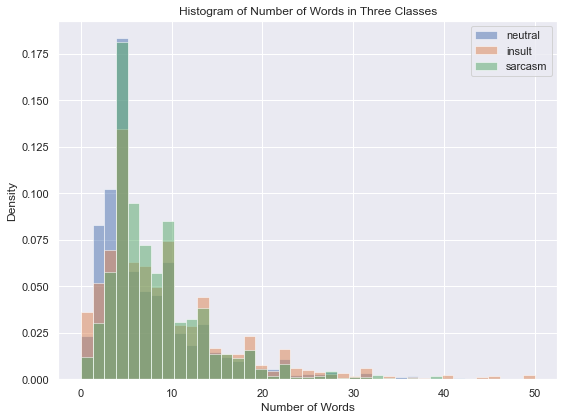

In [252]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 50, 40)
plt.hist(com[com['label']==0]['com_words'], bins, alpha=0.5, density=True, label='neutral')
plt.hist(com[com['label']==1]['com_words'], bins, alpha=0.5, density=True, label='insult')
plt.hist(com[com['label']==2]['com_words'], bins, alpha=0.5, density=True, label='sarcasm')

# Set the labels and title
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Histogram of Number of Words in Three Classes')

# Add a legend
plt.legend(loc='upper right')

# Adjust the plot layout to make the differences more visible
plt.tight_layout()

plt.show()

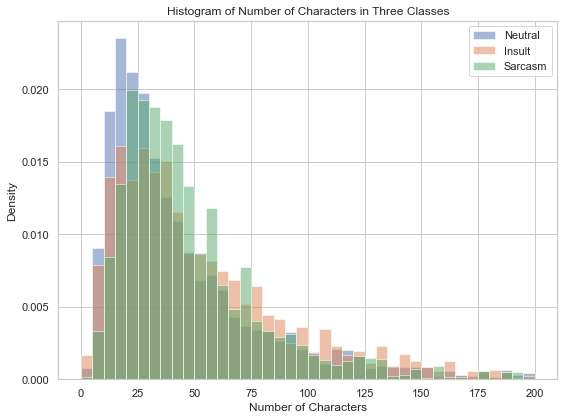

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size and style for plotting
sns.set(rc={"figure.figsize": (8, 6)})
sns.set_style("whitegrid")

# Data for each class
class0_chars = com[com['label'] == 0]['com_char']
class1_chars = com[com['label'] == 1]['com_char']
class2_chars = com[com['label'] == 2]['com_char']

# Define the number of bins and range for the histogram
num_bins = 40
range_min = 0
range_max = 200

# Plotting the histogram for each class
plt.hist(class0_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Neutral')
plt.hist(class1_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Insult')
plt.hist(class2_chars, bins=num_bins, range=(range_min, range_max), alpha=0.5, density=True, label='Sarcasm')

# Set the labels and title
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Histogram of Number of Characters in Three Classes')

# Add a legend
plt.legend(loc='upper right')

# Adjust the plot layout to make the differences more visible
plt.tight_layout()

# Show the plot
plt.show()

In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(messages_bow,com['label'],test_size=0.2,random_state=42)

In [254]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.69 / Recall: 0.679 / F1-Score: 0.677 / Accuracy: 67.898%


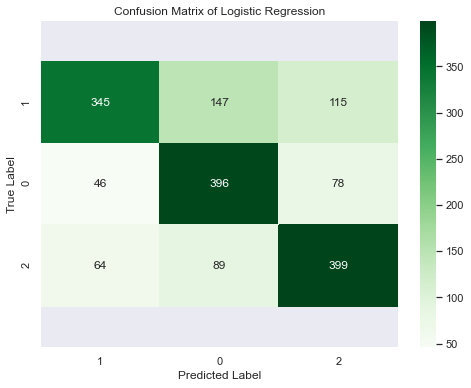

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

# Creating and training a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_vect, y_train)

# Prediction based on test data
y_pred = logreg.predict(X_test_vect)

# Estimation of model accuracy by calculating metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore, 3), round(accuracy * 100, 3)))

# Generate and plot the confusion matrix
sns.set(rc={"figure.figsize": (8, 6)})
cm = confusion_matrix(y_test, y_pred)
class_label = ["1", "0", "2"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [259]:
from sklearn.naive_bayes import MultinomialNB
classifier =MultinomialNB(alpha=1, fit_prior=True).fit(x_train,y_train)

Precision: 0.701 / Recall: 0.701 / F1-Score: 0.701 / Accuracy: 70.101%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


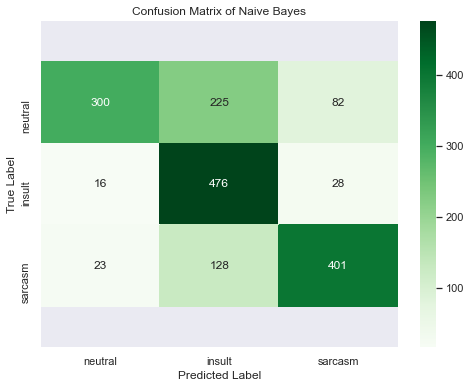

In [261]:
rf = MultinomialNB()

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=0, average='micro')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["neutral","insult","sarcasm"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap = 'Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix of Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision: 0.8 / Recall: 0.8 / F1-Score: 0.8 / Accuracy: 79.988%


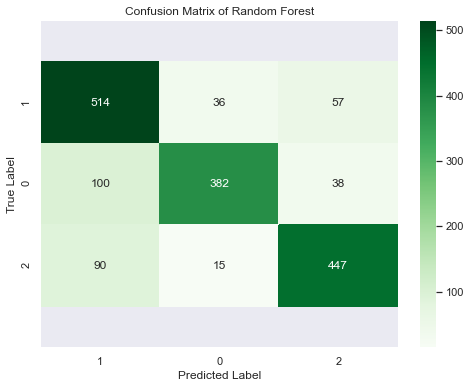

In [262]:
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

# Create and train the random forest classifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_vect)

# Estimation of model accuracy by calculating metrics
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=0, average='micro')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore, 3), round(accuracy * 100, 3)))

# Generate and plot the confusion matrix
sns.set(rc={"figure.figsize": (8, 6)})
cm = confusion_matrix(y_test, y_pred)
class_label = ["1", "0", "2"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.592 / Recall: 0.592 / F1-Score: 0.592 / Accuracy: 59.202%


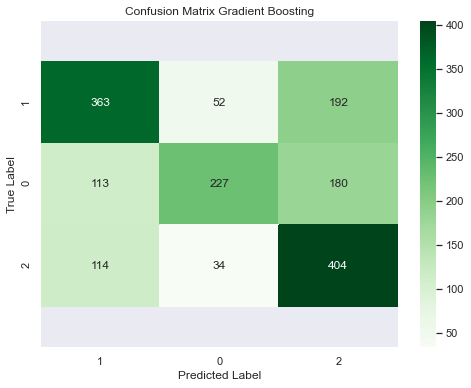

In [263]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the gradient boosting classifier
gbt = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gbt_model = gbt.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = gbt_model.predict(X_test_vect)

# Estimation of model accuracy by calculating metrics
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
fscore = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore, 3), round(accuracy * 100, 3)))

# Generate and plot the confusion matrix
sns.set(rc={"figure.figsize": (8, 6)})
cm = confusion_matrix(y_test, y_pred)
class_label = ["1", "0", "2"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()